<a href="https://colab.research.google.com/github/OlajideFemi/OlajideFemi.github.io/blob/index/Dissertation_Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import Library
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import json
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


<center><h1> West Midlands' Carbon Footprint </h1></center>

### Understanding the Data

<!-- <ul> -->
<!--  <li><h2> Understanding the Data</h2></li> -->
<!--  <li>Handling Missing Values</li> -->
<!--  <li>Remove Duplicates</li> -->
<!--  <li>Standardize Formats</li> -->
<!--  <li>Handle Outliers</li> -->
<!--  <li>Validate and correct data</li>  -->
<!--  <li>Document Changes</li> -->
<!--  <li>Test and iterate</li> -->
<!--  <li>Maintain data provence</li>   -->     
<!-- </ul> -->




<!-- <P><a href="https://www.gov.uk/government/statistics/uks-carbon-footprint">https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
</a></P> -->  

<b><P>Dataset:</b></P>
<p>
C. O'Sullivan, "UK local authority and regional greenhouse gas emissions national statistics: 2005-2021," Department of Business, Energy & Industrial Strategy, London, 2023.</p>
Accessed Date: 29 March, 2023
<P><b>Internet Repositories:</b></P>

<P><a href="https://www.gov.uk/government/statistics/uks-carbon-footprint">https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
</a></P>



<b><P>Stored On:</b></P>

<P>https://olajidefemi.github.io</P>

<P><a href="GitHub">https://raw.githubusercontent.com//OlajideFemi/OlajideFemi.github.io/index/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx
</a></P>


From exploration of the '1_1' sheet

 <p>Shape of the Data: The dataset contains 7106 rows and 50 columns.</p>
 <p>Summary of the Data:
   The dataset provides details for <b>12 unique regions</b>.
   There are data for 17 unique years, spanning from 2005 to 2021.
   Variables such as 'Industry Electricity', 'Industry Gas', and 'Industry Total'</p>





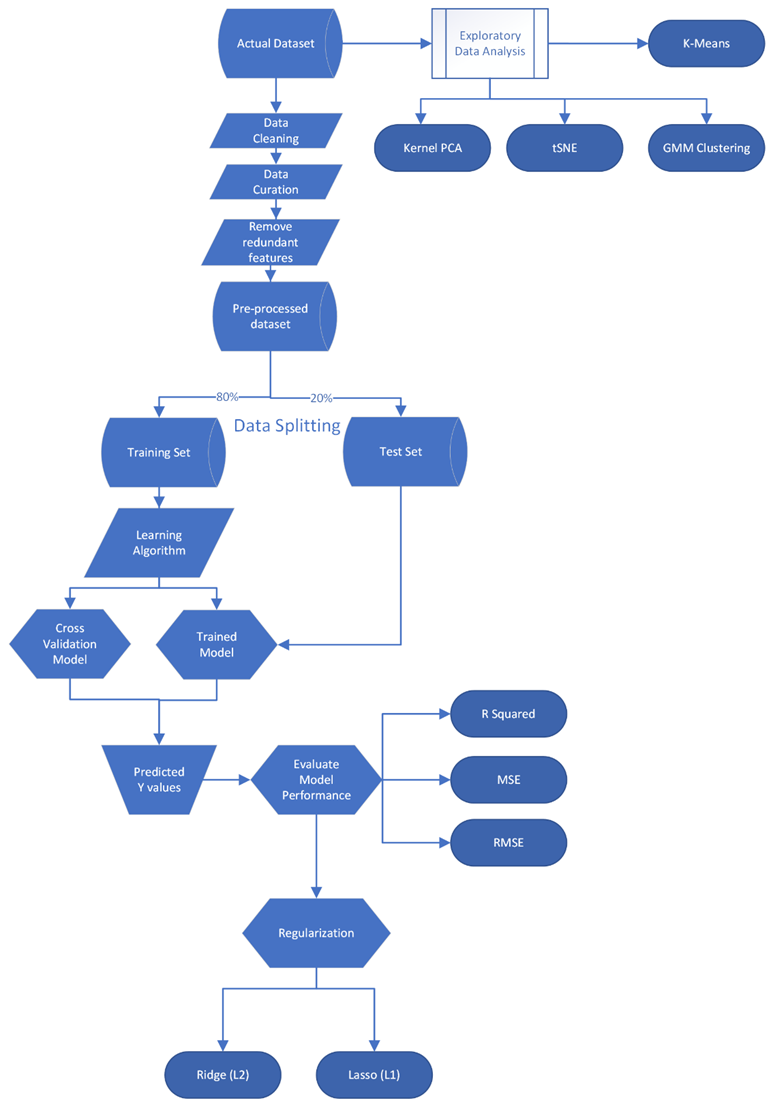

In [2]:
#Load the excel data on sheet 1_1
url = 'https://raw.githubusercontent.com//OlajideFemi/OlajideFemi.github.io/index/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx'
data_1_1 = pd.read_excel(url, sheet_name='1_1')
data_1_1.head()


,Table 1.1: Local Authority territorial greenhouse gas emissions estimates 2005-2021 (kt CO2e) - Full dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,This worksheet contains one table. The table c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Freeze panes are active on this sheet. To turn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Filters are active in cells A5 to AX5 and may ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
4,North East,Darlington,Darlington,E06000005,2005,51.87311,114.701874,0.045681,43.073543,209.694209,...,12.699185,63.7069,34.256022,5.613394,39.869415,968.661604,100.287,9.658895,197.4758,4.905217


In [3]:
# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

In [4]:
data_1_1_actual

3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
4,North East,Darlington,Darlington,E06000005,2005,51.87311,114.701874,0.045681,43.073543,209.694209,...,12.699185,63.7069,34.256022,5.613394,39.869415,968.661604,100.287,9.658895,197.4758,4.905217
5,North East,Darlington,Darlington,E06000005,2006,55.398988,97.614091,0.065836,42.086928,195.165842,...,11.659759,59.927177,31.802024,6.57408,38.376104,943.627506,101.509,9.295998,197.4758,4.778446
6,North East,Darlington,Darlington,E06000005,2007,52.249398,95.167732,0.074503,43.79521,191.286843,...,12.166507,59.716732,37.048534,6.81813,43.866664,925.275164,102.632,9.015465,197.4758,4.685512
7,North East,Darlington,Darlington,E06000005,2008,51.651166,95.266031,0.055964,35.982972,182.956132,...,12.55795,59.566044,7.662955,6.771385,14.43434,876.045542,103.694,8.448373,197.4758,4.436217
8,North East,Darlington,Darlington,E06000005,2009,45.607413,82.045964,1.061014,26.863721,155.578112,...,11.405542,57.689627,16.001037,6.053694,22.054731,805.592471,104.355,7.71973,197.4758,4.079449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,National Total,National Total,National Total,NaN,2017,18256.184881,15602.265158,33619.941766,17990.618473,85469.010278,...,9689.245642,51301.203756,15821.005923,5131.240623,20952.246546,437824.383087,66067.257699,6.62695,248717.5706,1.760328
7106,National Total,National Total,National Total,NaN,2018,20997.236163,19161.407779,32309.811618,17713.459471,90181.915031,...,9573.565596,51380.522611,15911.984565,5088.278772,21000.263337,430745.509283,66371.006647,6.489965,248717.5706,1.731866
7107,National Total,National Total,National Total,NaN,2019,18512.578663,18433.106892,31951.4012,17364.788398,86261.875153,...,9770.415392,50706.546836,15684.547926,5035.738233,20720.286159,416856.663324,66769.633181,6.243207,248717.5706,1.676024
7108,National Total,National Total,National Total,NaN,2020,15164.001049,17463.024978,30135.710515,17584.10729,80346.843833,...,8890.946812,49220.899615,14304.397217,4915.16683,19219.564047,376807.810496,67044.605507,5.620255,248717.5706,1.515003


In [5]:
# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)
data_1_1_actual

3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
0,North East,Darlington,Darlington,E06000005,2005,51.87311,114.701874,0.045681,43.073543,209.694209,...,12.699185,63.7069,34.256022,5.613394,39.869415,968.661604,100.287,9.658895,197.4758,4.905217
1,North East,Darlington,Darlington,E06000005,2006,55.398988,97.614091,0.065836,42.086928,195.165842,...,11.659759,59.927177,31.802024,6.57408,38.376104,943.627506,101.509,9.295998,197.4758,4.778446
2,North East,Darlington,Darlington,E06000005,2007,52.249398,95.167732,0.074503,43.79521,191.286843,...,12.166507,59.716732,37.048534,6.81813,43.866664,925.275164,102.632,9.015465,197.4758,4.685512
3,North East,Darlington,Darlington,E06000005,2008,51.651166,95.266031,0.055964,35.982972,182.956132,...,12.55795,59.566044,7.662955,6.771385,14.43434,876.045542,103.694,8.448373,197.4758,4.436217
4,North East,Darlington,Darlington,E06000005,2009,45.607413,82.045964,1.061014,26.863721,155.578112,...,11.405542,57.689627,16.001037,6.053694,22.054731,805.592471,104.355,7.71973,197.4758,4.079449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,National Total,National Total,National Total,NaN,2017,18256.184881,15602.265158,33619.941766,17990.618473,85469.010278,...,9689.245642,51301.203756,15821.005923,5131.240623,20952.246546,437824.383087,66067.257699,6.62695,248717.5706,1.760328
7102,National Total,National Total,National Total,NaN,2018,20997.236163,19161.407779,32309.811618,17713.459471,90181.915031,...,9573.565596,51380.522611,15911.984565,5088.278772,21000.263337,430745.509283,66371.006647,6.489965,248717.5706,1.731866
7103,National Total,National Total,National Total,NaN,2019,18512.578663,18433.106892,31951.4012,17364.788398,86261.875153,...,9770.415392,50706.546836,15684.547926,5035.738233,20720.286159,416856.663324,66769.633181,6.243207,248717.5706,1.676024
7104,National Total,National Total,National Total,NaN,2020,15164.001049,17463.024978,30135.710515,17584.10729,80346.843833,...,8890.946812,49220.899615,14304.397217,4915.16683,19219.564047,376807.810496,67044.605507,5.620255,248717.5706,1.515003


In [6]:
# Display the shape of the data
data_shape = data_1_1_actual.shape

data_shape

(7106, 50)

In [7]:
# Get a summary of the data
data_summary = data_1_1_actual.describe()

data_summary

3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
count,7106,7106,7106,6358,7106,7106.00000,7106.0,7106.0,7106.0,7106.000000,...,7106.0,7106.0,7106.0,7106.0,7106.0,7106.000000,7106.0,7106.0,7106.0,7106.0
unique,27,194,418,374,17,7106.00000,7002.0,6118.0,7073.0,7106.000000,...,7073.0,7073.0,7090.0,7073.0,7090.0,7106.000000,7050.0,7073.0,417.0,7073.0
top,South East,Scotland,Darlington,E06000005,2005,51.87311,0.0,0.0,0.0,209.694209,...,0.0,0.0,0.0,0.0,0.0,968.661604,0.0,0.0,0.0,0.0
freq,1190,544,17,17,418,1.00000,105.0,925.0,34.0,1.000000,...,34.0,34.0,17.0,34.0,17.0,1.000000,34.0,34.0,34.0,34.0


In [8]:
# Get a view of the datatypes

data_types = data_1_1_actual.dtypes
data_types

3
Region/Country                            object
Second Tier Authority                     object
Local Authority                           object
Local Authority Code                      object
Calendar Year                             object
Industry Electricity                      object
Industry Gas                              object
Large Industrial Installations            object
Industry 'Other'                          object
Industry Total                            object
Commercial Electricity                    object
Commercial Gas                            object
Commercial 'Other'                        object
Commercial Total                          object
Public Sector Electricity                 object
Public Sector Gas                         object
Public Sector 'Other'                     object
Public Sector Total                       object
Domestic Electricity                      object
Domestic Gas                              object
Domestic 'Other'  

In [9]:
# Check for missing values
missing_values = data_1_1_actual.isnull().sum()

missing_values

3
Region/Country                              0
Second Tier Authority                       0
Local Authority                             0
Local Authority Code                      748
Calendar Year                               0
Industry Electricity                        0
Industry Gas                                0
Large Industrial Installations              0
Industry 'Other'                            0
Industry Total                              0
Commercial Electricity                      0
Commercial Gas                              0
Commercial 'Other'                          0
Commercial Total                            0
Public Sector Electricity                   0
Public Sector Gas                           0
Public Sector 'Other'                       0
Public Sector Total                         0
Domestic Electricity                        0
Domestic Gas                                0
Domestic 'Other'                            0
Domestic Total                  

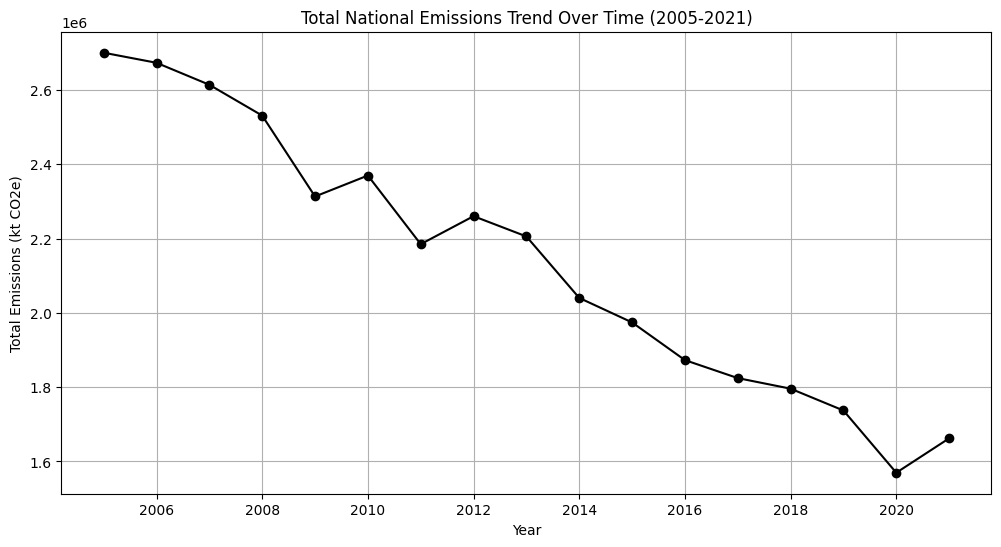

In [10]:
import matplotlib.pyplot as plt

# Group by 'Calendar Year' and sum the 'Grand Total' column to get total emissions for each year
yearly_emissions = data_1_1_actual.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the trend over time
plt.figure(figsize=(12, 6))
yearly_emissions.plot(marker='o', linestyle='-', color='black')
plt.title('Total National Emissions Trend Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()

In [11]:
# Convert the 'Grand Total' column to a numeric type
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Group by 'Local Authority Region/Country' and sum the 'Grand Total' column to get total emissions for each region again
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
regional_emissions = data_1_1_actual.groupby('Region/Country')['Grand Total'].sum()

# Sort the regional emissions in descending order and get the name of the first region
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
highest_emission_region = regional_emissions.sort_values(ascending=False).index[0]
highest_emission_value = regional_emissions.sort_values(ascending=False).iloc[0]

# Sort the regional emissions in ascending order and get the name of the first region
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
lowest_emission_region = regional_emissions.sort_values(ascending=True).index[0]
lowest_emission_value = regional_emissions.sort_values(ascending=True).iloc[0]

# Results
highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value


('National Total', 8763483.862937795, 'Unallocated', 70997.7272303627)

In [12]:
regional_emissions

Region/Country
East Midlands                     1.246579e+06
East Midlands Total               6.759135e+05
East of England                   1.518514e+06
East of England Total             7.986982e+05
England Total                     6.830838e+06
London                            7.105470e+05
London Total                      7.105470e+05
National Total                    8.763484e+06
North East                        4.513099e+05
North East Total                  4.513099e+05
North West                        1.419484e+06
North West Total                  9.620017e+05
Northern Ireland                  3.910081e+05
Northern Ireland Total            3.910081e+05
Scotland                          8.602071e+05
Scotland Total                    8.602071e+05
South East                        1.713013e+06
South East Total                  1.001996e+06
South West                        1.073928e+06
South West Total                  6.987242e+05
Unallocated                       7.099773e+0

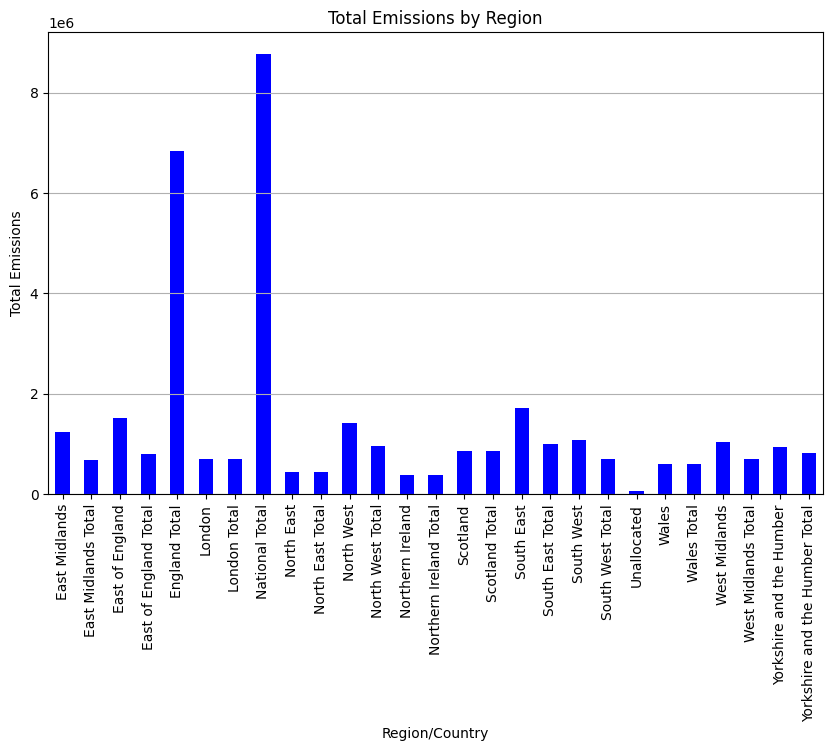

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [14]:
# Drop 'National Total','England Total' and 'Unallocated' from the Series
regional_emissions = regional_emissions.drop(labels=['National Total','England Total', 'Unallocated'])

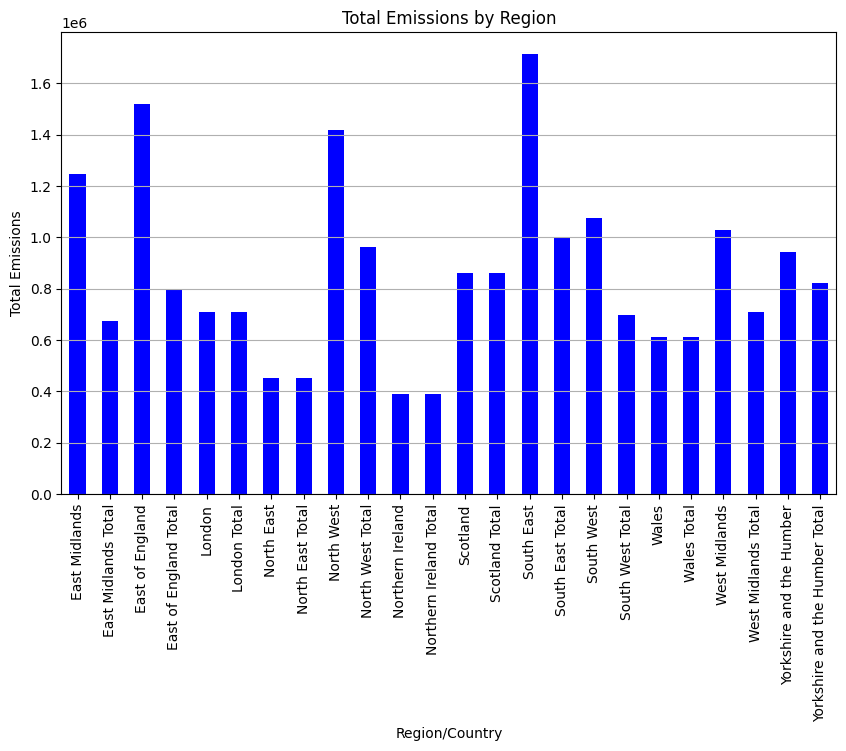

In [15]:
plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [16]:
# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter out rows where 'Region/Country' ends with 'Total' or is 'Unallocated'
data_1_1_filtered = data_1_1_actual[
    ~data_1_1_actual['Region/Country'].str.endswith('Total') &
    ~data_1_1_actual['Region/Country'].str.contains('Unallocated', case=False)
]

# Group by 'Region/Country' and sum the 'Grand Total' column
regional_emissions = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

# Identify the regions with the highest and lowest cumulative emissions
highest_emission_region = regional_emissions.idxmax()
lowest_emission_region = regional_emissions.idxmin()

# Get the corresponding values for the highest and lowest emissions
highest_emission_value = regional_emissions[highest_emission_region]
lowest_emission_value = regional_emissions[lowest_emission_region]

# Output the results
(highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value)

('South East', 1713012.733123874, 'Northern Ireland', 391008.14327239833)

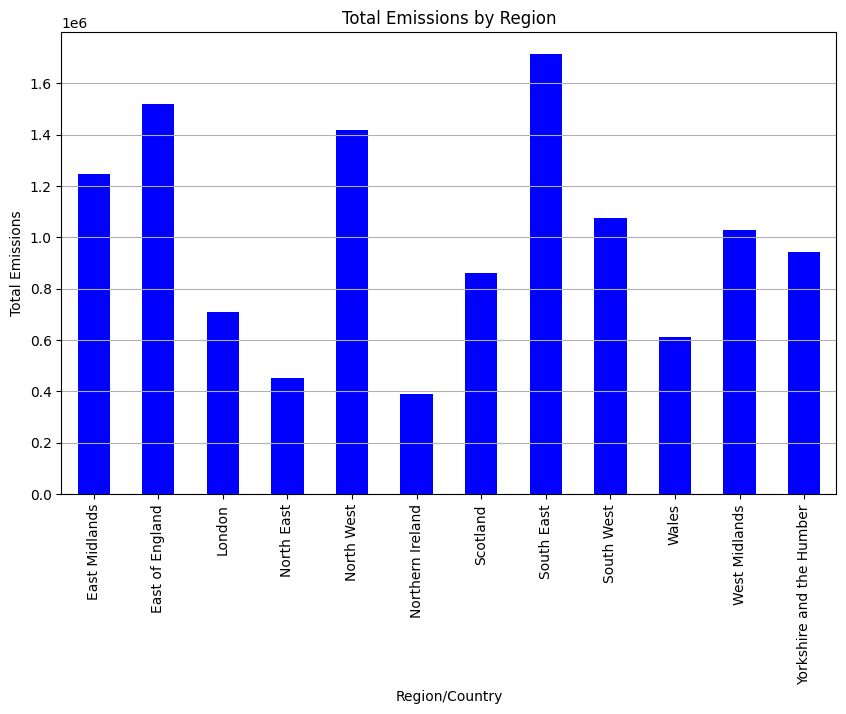

In [17]:
import matplotlib.pyplot as plt

# regional_emissions
# regional_emissions = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [18]:
regional_emissions

Region/Country
East Midlands               1.246579e+06
East of England             1.518514e+06
London                      7.105470e+05
North East                  4.513099e+05
North West                  1.419484e+06
Northern Ireland            3.910081e+05
Scotland                    8.602071e+05
South East                  1.713013e+06
South West                  1.073928e+06
Wales                       6.104329e+05
West Midlands               1.030287e+06
Yorkshire and the Humber    9.443414e+05
Name: Grand Total, dtype: float64

In [19]:
import geopandas as gpd
#file_path = 'uk_regions.geojson'
#file_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/uk_regions.geojson'
#uk_regions_gdf = gpd.read_file(file_path)
#uk_regions_gdf_head = uk_regions_gdf.head()


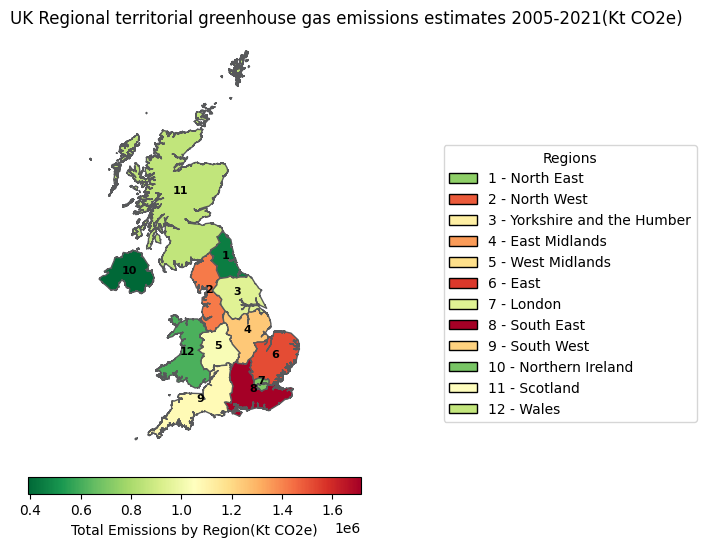

In [35]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

file_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/uk_regions.geojson'

uk_regions_gdf = gpd.read_file(file_path)

#emissions_data = {
#    "Region/Country": [
#        "East Midlands", "East of England", "London", "North East", "North West",
#        "Northern Ireland", "Scotland", "South East", "South West", "Wales",
#        "West Midlands", "Yorkshire and the Humber"
#    ],
#    "Grand Total": [
#        1.246579e+06, 1.518514e+06, 7.105470e+05, 4.513099e+05, 1.419484e+06,
#        3.910081e+05, 8.602071e+05, 1.713013e+06, 1.073928e+06, 6.104329e+05,
#        1.030287e+06, 9.443414e+05
#    ]
#}

emissions_df = regional_emissions.reset_index()
emissions_df.columns = ['Region/Country', 'Grand Total']

#emissions_df = pd.DataFrame(emissions_data)
emissions_df['Region/Country'] = emissions_df['Region/Country'].replace({'East of England': 'East'})

uk_regions_with_emissions = uk_regions_gdf.merge(emissions_df, left_on='rgn19nm', right_on='Region/Country', how='left')

uk_regions_with_emissions['Number'] = range(1, len(uk_regions_with_emissions) + 1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
uk_regions_with_emissions.plot(column='Grand Total', ax=ax, cmap='RdYlGn_r', edgecolor='#58595B')

cmap = plt.cm.RdYlGn_r
norm = mcolors.Normalize(vmin=uk_regions_with_emissions['Grand Total'].min(), vmax=uk_regions_with_emissions['Grand Total'].max())

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Total Emissions by Region(Kt CO2e)')

for idx, row in uk_regions_with_emissions.iterrows():
    plt.annotate(text=str(row['Number']), xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight='bold', color='black', fontsize=8)

legend_elements = [Patch(facecolor=plt.cm.RdYlGn_r(emission / uk_regions_with_emissions['Grand Total'].max()), edgecolor='black',
                         label=f"{number} - {region}") for number, region, emission in zip(uk_regions_with_emissions['Number'],
                         uk_regions_with_emissions['rgn19nm'], uk_regions_with_emissions['Grand Total'])]

ax.legend(handles=legend_elements, title="Regions", bbox_to_anchor=(1.55, 0.75), loc='upper left')

ax.set_title('UK Regional territorial greenhouse gas emissions estimates 2005-2021(Kt CO2e)', loc='left', position=(-0.3, 1))
plt.axis('off')
plt.show()


The term "**UK Regional Territorial Greenhouse Gas Emissions Estimates 2005-2021 (Kt CO2e)**" refers to statistical data that quantifies the amount of greenhouse gases emitted within the territorial boundaries of the United Kingdom's regions from the years 2005 to 2021. The data is expressed in kilotonnes of carbon dioxide equivalent (Kt CO2e)

**UK Regional**: This specifies that the data is broken down by different regions within the United Kingdom, such as England, Scotland, Wales, and Northern Ireland etc.

**Greenhouse Gas Emissions**: Greenhouse gases include carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), and fluorinated gases, all of which trap heat in the Earth's atmosphere, leading to global warming and climate change. The data encompasses all these types of emissions.

**Kt CO2e**: Kilotonnes of carbon dioxide equivalent is a standard unit of measurement that equates the impact of different greenhouse gases to the equivalent amount of CO2, based on their global warming potential (GWP). This unit allows for the combination of different greenhouse gases into a single figure that represents their overall impact on global warming.

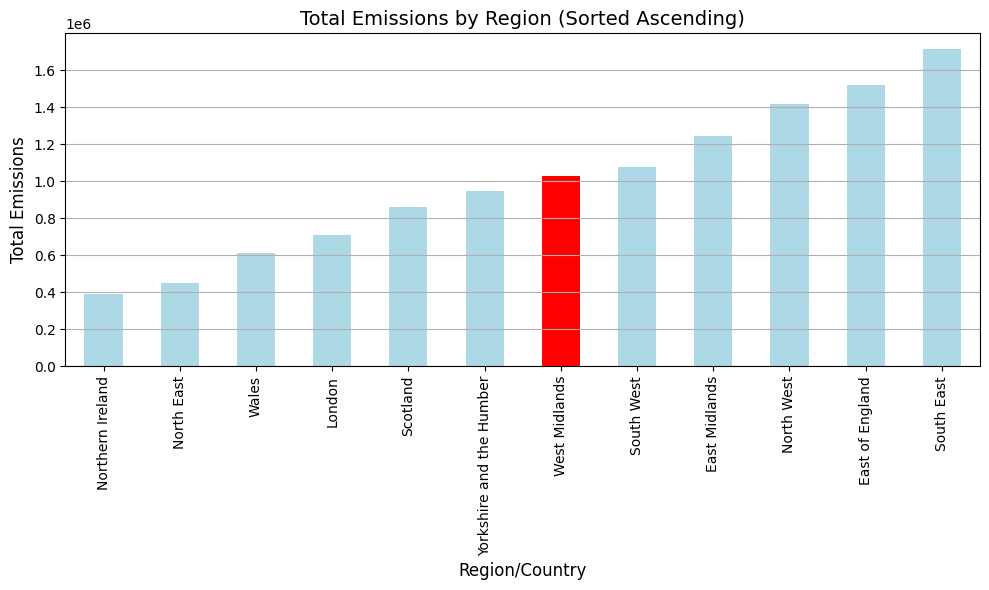

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the series in ascending order for the plot
sorted_emissions = regional_emissions.sort_values()

colors = ['red' if region == 'West Midlands' else 'lightblue' for region in sorted_emissions.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
sorted_emissions.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Total Emissions by Region (Sorted Ascending)', fontsize=14)
plt.xlabel('Region/Country', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Group by 'Region/Country' and sum the 'Grand Total' column
regional_emissions_total = data_1_1_actual.groupby('Region/Country')['Grand Total'].sum()

# Drop 'National Total' and 'Unallocated' from the Series
regional_emissions_total = regional_emissions_total.drop(labels=['National Total', 'Unallocated'])

# Identify the regions with the highest and lowest cumulative emissions
highest_emission_region = regional_emissions_total.idxmax()
lowest_emission_region = regional_emissions_total.idxmin()

# Get the corresponding values for the highest and lowest emissions
highest_emission_value = regional_emissions_total[highest_emission_region]
lowest_emission_value = regional_emissions_total[lowest_emission_region]

# Output the results
(highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value)

('England Total', 6830837.969058414, 'Northern Ireland', 391008.14327239833)

In [38]:
# Convert 'Grand Total' to numeric, coercing errors to NaN
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Keep only rows where 'Region/Country' ends with 'total'
data_1_1_filtered = data_1_1_actual[
    data_1_1_actual['Region/Country'].str.lower().str.endswith('total')
]


# Group by 'Region/Country' and sum 'Grand Total' for remaining regions
regional_emissions_total = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

# Drop 'Unallocated' from the Series
#regional_emissions_total = regional_emissions_total.drop(labels=['Unallocated'])

# Drop 'National Total' from the Series
regional_emissions_total = regional_emissions_total.drop(labels=['National Total'])

# Drop 'England Total' from the Series
regional_emissions_total = regional_emissions_total.drop(labels=['England Total'])

# Identify the highest and lowest emission regions
highest_emission_region = regional_emissions_total.idxmax()
lowest_emission_region = regional_emissions_total.idxmin()

# Get the highest and lowest emission values
highest_emission_value = regional_emissions_total[highest_emission_region]
lowest_emission_value = regional_emissions_total[lowest_emission_region]

# Results
highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value

('South East Total',
 1001996.0574329,
 'Northern Ireland Total',
 391008.14327239833)

In [39]:
# Sort the regional emissions in descending order and get the name of the first region
highest_emission_region = regional_emissions.sort_values(ascending=False).index[0]
highest_emission_value = regional_emissions.sort_values(ascending=False).iloc[0]

# Sort the regional emissions in ascending order and get the name of the first region
lowest_emission_region = regional_emissions.sort_values(ascending=True).index[0]
lowest_emission_value = regional_emissions.sort_values(ascending=True).iloc[0]

# Results
highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value

('South East', 1713012.733123874, 'Northern Ireland', 391008.14327239833)

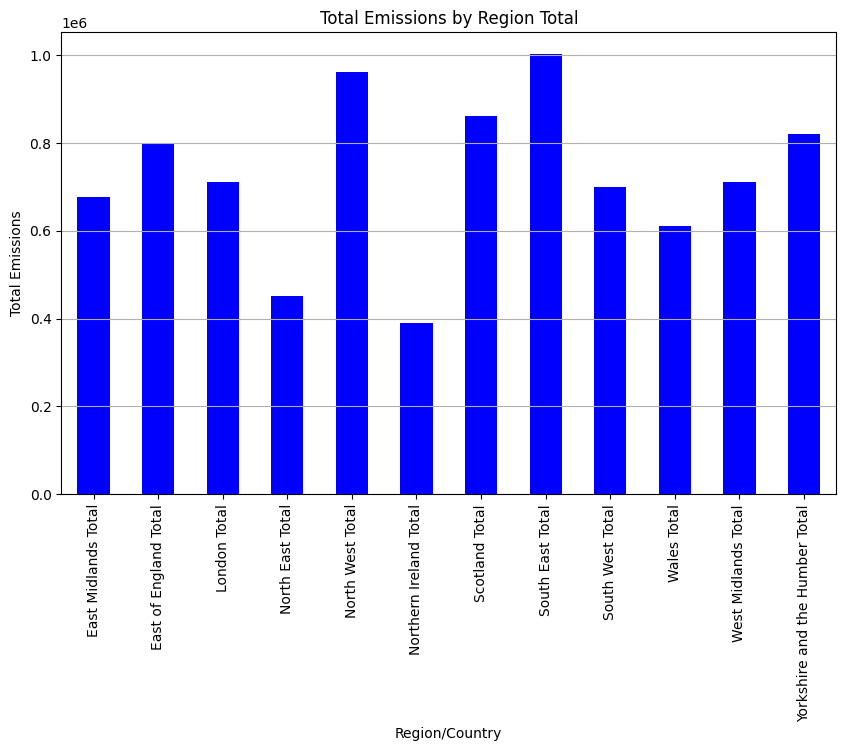

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
regional_emissions_total.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region Total')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [41]:
regional_emissions_total

Region/Country
East Midlands Total               6.759135e+05
East of England Total             7.986982e+05
London Total                      7.105470e+05
North East Total                  4.513099e+05
North West Total                  9.620017e+05
Northern Ireland Total            3.910081e+05
Scotland Total                    8.602071e+05
South East Total                  1.001996e+06
South West Total                  6.987242e+05
Wales Total                       6.104329e+05
West Midlands Total               7.107770e+05
Yorkshire and the Humber Total    8.208705e+05
Name: Grand Total, dtype: float64

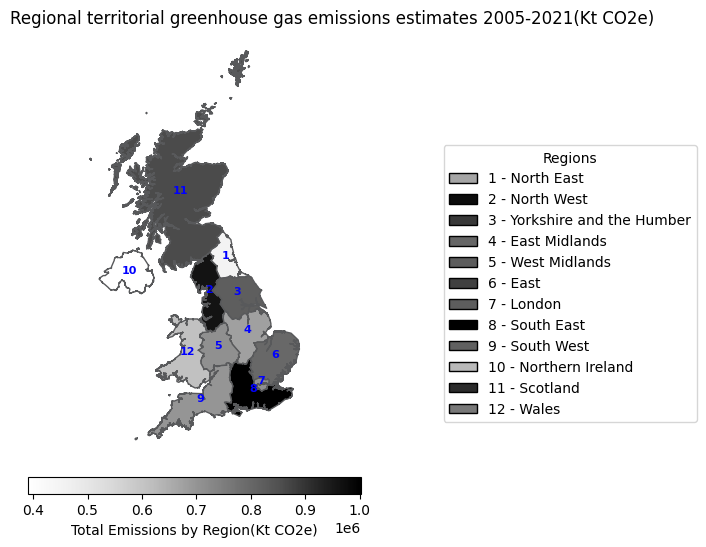

In [47]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

file_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/uk_regions.geojson'

uk_regions_gdf = gpd.read_file(file_path)

emissions_df = regional_emissions_total.reset_index()
emissions_df.columns = ['Region/Country', 'Grand Total']

#emissions_df['Region/Country'] = emissions_df['Region/Country'].replace({'East of England': 'East'})
replacements = {
    'East of England Total': 'East',
    'East Midlands Total': 'East Midlands',
    'London Total': 'London',
    'North East Total': 'North East',
    'North West Total': 'North West',
    'Northern Ireland Total': 'Northern Ireland',
    'Scotland Total': 'Scotland',
    'South East Total': 'South East',
    'South West Total': 'South West',
    'Wales Total': 'Wales',
    'West Midlands Total': 'West Midlands',
    'Yorkshire and the Humber Total': 'Yorkshire and the Humber'
}

emissions_df['Region/Country'] = emissions_df['Region/Country'].replace(replacements)



uk_regions_with_emissions = uk_regions_gdf.merge(emissions_df, left_on='rgn19nm', right_on='Region/Country', how='left')

uk_regions_with_emissions['Number'] = range(1, len(uk_regions_with_emissions) + 1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
uk_regions_with_emissions.plot(column='Grand Total', ax=ax, cmap='Greys', edgecolor='#58595B')

cmap = plt.cm.Greys
norm = mcolors.Normalize(vmin=uk_regions_with_emissions['Grand Total'].min(), vmax=uk_regions_with_emissions['Grand Total'].max())

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Total Emissions by Region(Kt CO2e)')

for idx, row in uk_regions_with_emissions.iterrows():
    plt.annotate(text=str(row['Number']), xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight='bold', color='blue', fontsize=8)

legend_elements = [Patch(facecolor=plt.cm.Greys(emission / uk_regions_with_emissions['Grand Total'].max()), edgecolor='black',
                         label=f"{number} - {region}") for number, region, emission in zip(uk_regions_with_emissions['Number'],
                         uk_regions_with_emissions['rgn19nm'], uk_regions_with_emissions['Grand Total'])]

ax.legend(handles=legend_elements, title="Regions", bbox_to_anchor=(1.55, 0.75), loc='upper left')

ax.set_title('Regional territorial greenhouse gas emissions estimates 2005-2021(Kt CO2e)', loc='left', position=(-0.3, 1))
plt.axis('off')
plt.show()


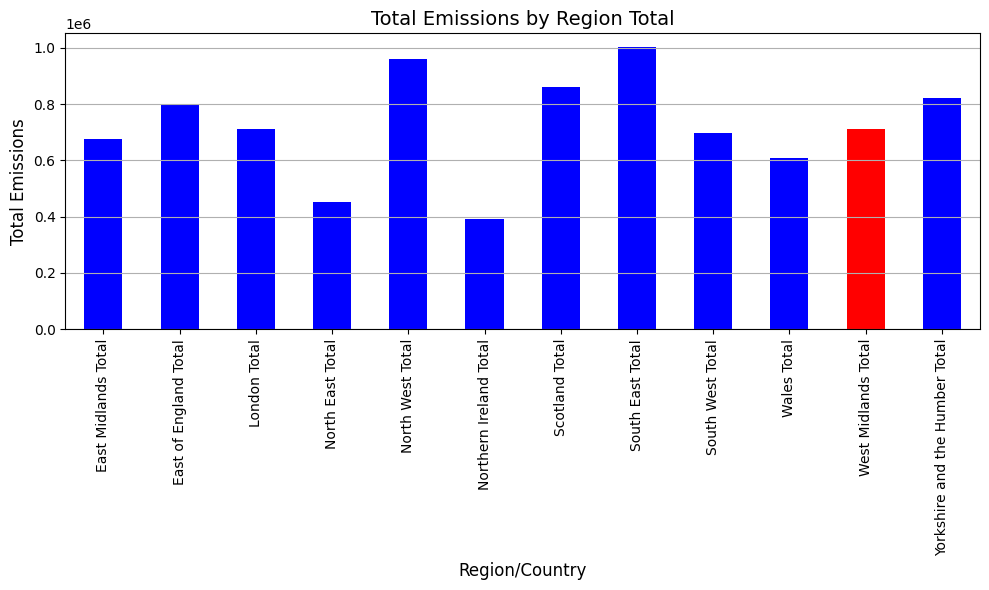

In [48]:
# Convert the dictionary to a pandas Series
emissions_series = pd.Series(regional_emissions_total)

colors = ['red' if region == 'West Midlands Total' else 'blue' for region in emissions_series.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
emissions_series.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Total Emissions by Region Total', fontsize=14)
plt.xlabel('Region/Country', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
# plt.savefig('emissions_by_region_total.png')

# Show the plot
plt.tight_layout()
plt.show()

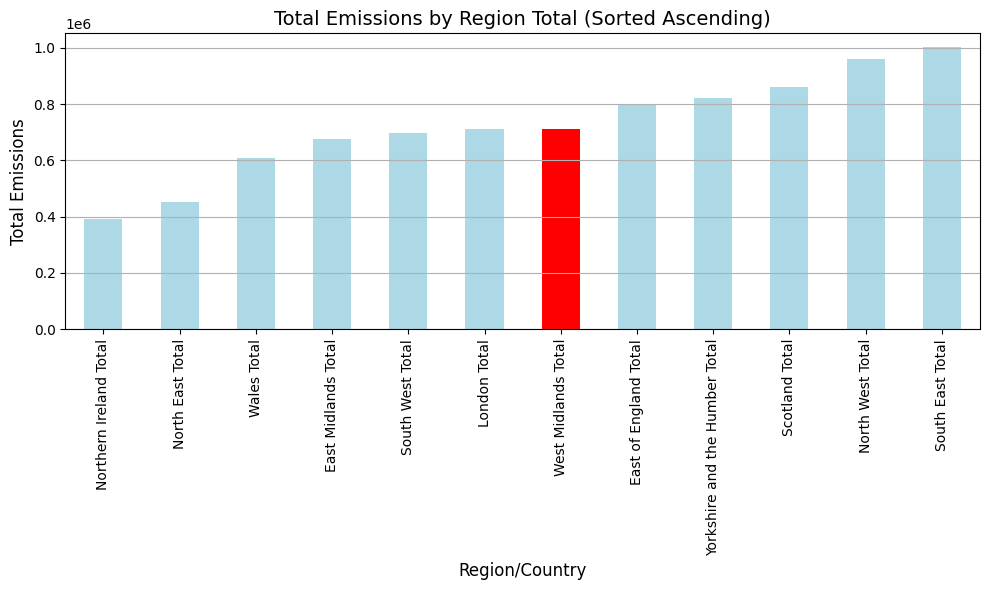

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the series in ascending order for the plot
sorted_emissions = regional_emissions_total.sort_values()

# Define the colors for the bars, 'red' for 'West Midlands Total', 'skyblue' for the rest
colors = ['red' if region == 'West Midlands Total' else 'lightblue' for region in sorted_emissions.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
sorted_emissions.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Total Emissions by Region Total (Sorted Ascending)', fontsize=14)
plt.xlabel('Region/Country', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

<h1>WestMidlands</h1>

In [50]:
# Filter the data for the "West Midlands" Region/Country
west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']
west_midlands_data

3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
2040,West Midlands,Birmingham,Birmingham,E08000025,2005,526.551509,366.037594,61.953269,261.620286,1216.162658,...,2.318744,15.128539,11.122149,43.552592,54.674741,7059.334372,1014.65,6.957408,267.7912,26.361338
2041,West Midlands,Birmingham,Birmingham,E08000025,2006,537.58464,325.085629,82.275024,254.186129,1199.131422,...,2.519812,15.762343,10.324532,48.716274,59.040806,6952.112034,1020.843,6.810168,267.7912,25.960943
2042,West Midlands,Birmingham,Birmingham,E08000025,2007,510.882763,311.246683,94.635887,259.93259,1176.697923,...,2.361162,15.055982,36.275553,50.047079,86.322633,6800.522322,1029.021,6.60873,267.7912,25.394869
2043,West Midlands,Birmingham,Birmingham,E08000025,2008,529.503396,305.588896,133.077044,207.353832,1175.523168,...,2.487657,14.784999,30.037779,48.617361,78.655141,6744.677640,1038.98,6.491634,267.7912,25.18633
2044,West Midlands,Birmingham,Birmingham,E08000025,2009,429.653608,281.346962,44.531193,182.413125,937.944889,...,2.289698,13.508004,159.413026,47.379221,206.792247,6099.737055,1050.072,5.808875,267.7912,22.777959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,West Midlands,Worcestershire Total,Worcestershire Total,NaN,2017,152.467092,116.944652,19.834311,217.425383,506.671438,...,68.894191,386.871084,216.880509,46.866939,263.747448,3987.637970,596.365709,6.686565,1740.5141,2.291069
2597,West Midlands,Worcestershire Total,Worcestershire Total,NaN,2018,172.838333,131.012733,21.624796,232.232283,557.708145,...,69.275392,405.306105,194.41849,46.092127,240.510617,3895.210521,600.345089,6.488286,1740.5141,2.237966
2598,West Midlands,Worcestershire Total,Worcestershire Total,NaN,2019,146.809055,137.062654,19.014284,197.144455,500.030448,...,72.29286,383.175445,194.909071,47.087417,241.996488,3745.219387,604.075264,6.199922,1740.5141,2.151789
2599,West Midlands,Worcestershire Total,Worcestershire Total,NaN,2020,121.875589,115.848439,15.014089,197.552499,450.290616,...,60.056299,359.954182,193.621385,44.625131,238.246516,3293.630698,606.317326,5.43219,1740.5141,1.892332


In [51]:
# Filter out rows where "Second Tier Authority" ends with "Total"
west_midlands_data_filtered = west_midlands_data[~west_midlands_data['Second Tier Authority'].str.endswith("Total")]
west_midlands_data_filtered


3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
2040,West Midlands,Birmingham,Birmingham,E08000025,2005,526.551509,366.037594,61.953269,261.620286,1216.162658,...,2.318744,15.128539,11.122149,43.552592,54.674741,7059.334372,1014.65,6.957408,267.7912,26.361338
2041,West Midlands,Birmingham,Birmingham,E08000025,2006,537.58464,325.085629,82.275024,254.186129,1199.131422,...,2.519812,15.762343,10.324532,48.716274,59.040806,6952.112034,1020.843,6.810168,267.7912,25.960943
2042,West Midlands,Birmingham,Birmingham,E08000025,2007,510.882763,311.246683,94.635887,259.93259,1176.697923,...,2.361162,15.055982,36.275553,50.047079,86.322633,6800.522322,1029.021,6.60873,267.7912,25.394869
2043,West Midlands,Birmingham,Birmingham,E08000025,2008,529.503396,305.588896,133.077044,207.353832,1175.523168,...,2.487657,14.784999,30.037779,48.617361,78.655141,6744.677640,1038.98,6.491634,267.7912,25.18633
2044,West Midlands,Birmingham,Birmingham,E08000025,2009,429.653608,281.346962,44.531193,182.413125,937.944889,...,2.289698,13.508004,159.413026,47.379221,206.792247,6099.737055,1050.072,5.808875,267.7912,22.777959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,West Midlands,Worcestershire,Wyre Forest,E07000239,2017,21.596821,10.207297,1.131147,48.643531,81.578795,...,6.365818,33.125984,35.766842,5.064742,40.831584,499.390383,101.886605,4.901433,195.4038,2.555684
2580,West Midlands,Worcestershire,Wyre Forest,E07000239,2018,26.603644,13.005476,1.125587,59.088112,99.82282,...,6.132734,32.343872,32.129977,5.063163,37.19314,489.710354,102.301938,4.786912,195.4038,2.506145
2581,West Midlands,Worcestershire,Wyre Forest,E07000239,2019,23.235559,17.494639,1.147332,42.889724,84.767255,...,6.015508,31.772339,31.502365,4.954569,36.456934,458.909804,102.485512,4.477802,195.4038,2.34852
2582,West Midlands,Worcestershire,Wyre Forest,E07000239,2020,17.900403,11.514084,1.128091,44.760307,75.302885,...,5.358702,30.189129,31.393792,4.728242,36.122034,408.559610,102.162048,3.999133,195.4038,2.090848


In [52]:
# Pivot table creation
pivot_table = pd.pivot_table(
    west_midlands_data_filtered,
    values=[
        'Commercial Total', 'Waste Management Total', 'Agriculture Total',
        'Transport Total', 'Domestic Total', 'Public Sector Total',
        'Industry Total', 'LULUCF Net Emissions','Emissions per km2 (kt CO2e)'
    ],
    index=['Calendar Year'],
    aggfunc=sum
)

# Transpose the pivot table to have categories as rows and years as columns
pivot_table_transposed = pivot_table.T

# Print the transposed pivot table
# print(pivot_table_transposed)
# pivot_table_transposed.to_csv('features_by_years.csv')

In [53]:
pivot_table

3,Agriculture Total,Commercial Total,Domestic Total,Emissions per km2 (kt CO2e),Industry Total,LULUCF Net Emissions,Public Sector Total,Transport Total,Waste Management Total
Calendar Year,,,,,,,,,
2005,4028.975542,5809.331253,13449.536094,289.942804,10110.465071,-317.593628,2157.052152,13501.323430,993.132504
2006,3977.611559,6076.632436,13583.317568,288.863353,10197.714268,-326.862871,2068.237300,13305.491246,982.898678
2007,3905.022430,5783.889127,13081.835599,286.449175,10138.235254,-364.168107,1940.546956,13427.290157,1704.174232
2008,3896.858302,5577.457160,13033.414716,274.077573,9265.801065,-409.084036,1836.585244,12933.307202,1555.034766
2009,3807.240767,4712.011264,11835.167963,252.942548,8063.486578,-410.381053,1569.812241,12494.989414,2215.670625
2010,3840.081371,5001.267074,12685.403118,265.708579,8605.356043,-416.001919,1702.472983,12409.032802,2569.207488
2011,3761.345066,4672.226863,11112.642004,244.269938,8053.840463,-437.639005,1543.437224,12275.012297,2099.168770
2012,3809.765776,4997.596854,11868.951211,250.674974,7934.255575,-405.366106,1655.926145,12166.688081,2004.062529
2013,3722.949528,4772.413248,11531.527193,245.219017,7930.368103,-444.516700,1632.970841,12070.626129,1965.555586


In [54]:
pivot_table_transposed

Calendar Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
3,,,,,,,,,,,,,,,,,
Agriculture Total,4028.975542,3977.611559,3905.022430,3896.858302,3807.240767,3840.081371,3761.345066,3809.765776,3722.949528,3809.989355,3805.798780,3692.000037,3766.397313,3806.417076,3752.726686,3573.008128,3639.604571
Commercial Total,5809.331253,6076.632436,5783.889127,5577.457160,4712.011264,5001.267074,4672.226863,4997.596854,4772.413248,4075.739643,3700.093353,3288.671641,2555.056076,1707.805299,1378.760231,1094.025601,1289.487328
Domestic Total,13449.536094,13583.317568,13081.835599,13033.414716,11835.167963,12685.403118,11112.642004,11868.951211,11531.527193,9798.620535,9562.443689,9036.525528,8585.065579,8419.354441,8136.337663,7960.604044,8254.300582
Emissions per km2 (kt CO2e),289.942804,288.863353,286.449175,274.077573,252.942548,265.708579,244.269938,250.674974,245.219017,226.299273,221.343256,211.633827,205.073094,199.917735,189.296645,169.355461,181.918944
Industry Total,10110.465071,10197.714268,10138.235254,9265.801065,8063.486578,8605.356043,8053.840463,7934.255575,7930.368103,7683.166895,7258.445476,6871.729735,6795.989583,7338.841582,6823.598748,6329.377088,7025.526089
LULUCF Net Emissions,-317.593628,-326.862871,-364.168107,-409.084036,-410.381053,-416.001919,-437.639005,-405.366106,-444.516700,-443.113774,-467.135531,-419.905408,-447.164862,-432.569368,-457.906092,-461.502795,-458.060889
Public Sector Total,2157.052152,2068.237300,1940.546956,1836.585244,1569.812241,1702.472983,1543.437224,1655.926145,1632.970841,1407.210297,1343.820223,1185.686926,1247.662167,1400.427797,1289.674005,1210.227228,1333.317247
Transport Total,13501.323430,13305.491246,13427.290157,12933.307202,12494.989414,12409.032802,12275.012297,12166.688081,12070.626129,12321.712167,12586.051221,12802.317734,12775.515791,12562.288533,12222.766602,9941.294068,11009.606016
Waste Management Total,993.132504,982.898678,1704.174232,1555.034766,2215.670625,2569.207488,2099.168770,2004.062529,1965.555586,1760.419340,1781.099069,1976.630326,2203.734087,2002.438545,1934.145194,1725.606782,1643.074363


In [55]:
pivot_table_transposed.corr()

Calendar Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Calendar Year,,,,,,,,,,,,,,,,,
2005,1.000000,0.999707,0.998732,0.998613,0.991479,0.991547,0.991912,0.993618,0.993859,0.983923,0.975687,0.961511,0.946135,0.939583,0.932480,0.947603,0.948853
2006,0.999707,1.000000,0.998403,0.998334,0.989789,0.990788,0.990035,0.992557,0.992489,0.980433,0.971191,0.955886,0.939172,0.931815,0.924216,0.940674,0.941725
2007,0.998732,0.998403,1.000000,0.998963,0.994393,0.994761,0.995211,0.995505,0.996049,0.987501,0.979535,0.966698,0.952439,0.945399,0.938189,0.951952,0.953161
2008,0.998613,0.998334,0.998963,1.000000,0.996148,0.996680,0.995657,0.997844,0.997708,0.986340,0.978960,0.965865,0.950809,0.941955,0.935568,0.950719,0.950351
2009,0.991479,0.989789,0.994393,0.996148,1.000000,0.998480,0.999338,0.999391,0.999718,0.993185,0.989331,0.980747,0.969569,0.959834,0.955375,0.966119,0.964785
2010,0.991547,0.990788,0.994761,0.996680,0.998480,1.000000,0.996746,0.998603,0.998446,0.986271,0.980466,0.969608,0.957166,0.947864,0.942720,0.958749,0.955883
2011,0.991912,0.990035,0.995211,0.995657,0.999338,0.996746,1.000000,0.998421,0.999245,0.996167,0.992308,0.984251,0.973556,0.964359,0.959465,0.967777,0.967906
2012,0.993618,0.992557,0.995505,0.997844,0.999391,0.998603,0.998421,1.000000,0.999808,0.990443,0.985482,0.975169,0.961938,0.950899,0.945959,0.958274,0.956731
2013,0.993859,0.992489,0.996049,0.997708,0.999718,0.998446,0.999245,0.999808,1.000000,0.992578,0.987924,0.978229,0.965972,0.956038,0.951104,0.962484,0.961484


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [56]:
pivot_table.corr()

3,Agriculture Total,Commercial Total,Domestic Total,Emissions per km2 (kt CO2e),Industry Total,LULUCF Net Emissions,Public Sector Total,Transport Total,Waste Management Total
3,,,,,,,,,
Agriculture Total,1.000000,0.775494,0.793451,0.860274,0.880980,0.833005,0.861581,0.852000,-0.477497
Commercial Total,0.775494,1.000000,0.959494,0.974504,0.866052,0.729578,0.847188,0.680485,-0.267074
Domestic Total,0.793451,0.959494,1.000000,0.983375,0.928145,0.796254,0.934487,0.608518,-0.313520
Emissions per km2 (kt CO2e),0.860274,0.974504,0.983375,1.000000,0.942496,0.818817,0.925586,0.732963,-0.321745
Industry Total,0.880980,0.866052,0.928145,0.942496,1.000000,0.889868,0.975990,0.684668,-0.527468
LULUCF Net Emissions,0.833005,0.729578,0.796254,0.818817,0.889868,1.000000,0.887573,0.665688,-0.608115
Public Sector Total,0.861581,0.847188,0.934487,0.925586,0.975990,0.887573,1.000000,0.604193,-0.542619
Transport Total,0.852000,0.680485,0.608518,0.732963,0.684668,0.665688,0.604193,1.000000,-0.237519
Waste Management Total,-0.477497,-0.267074,-0.313520,-0.321745,-0.527468,-0.608115,-0.542619,-0.237519,1.000000


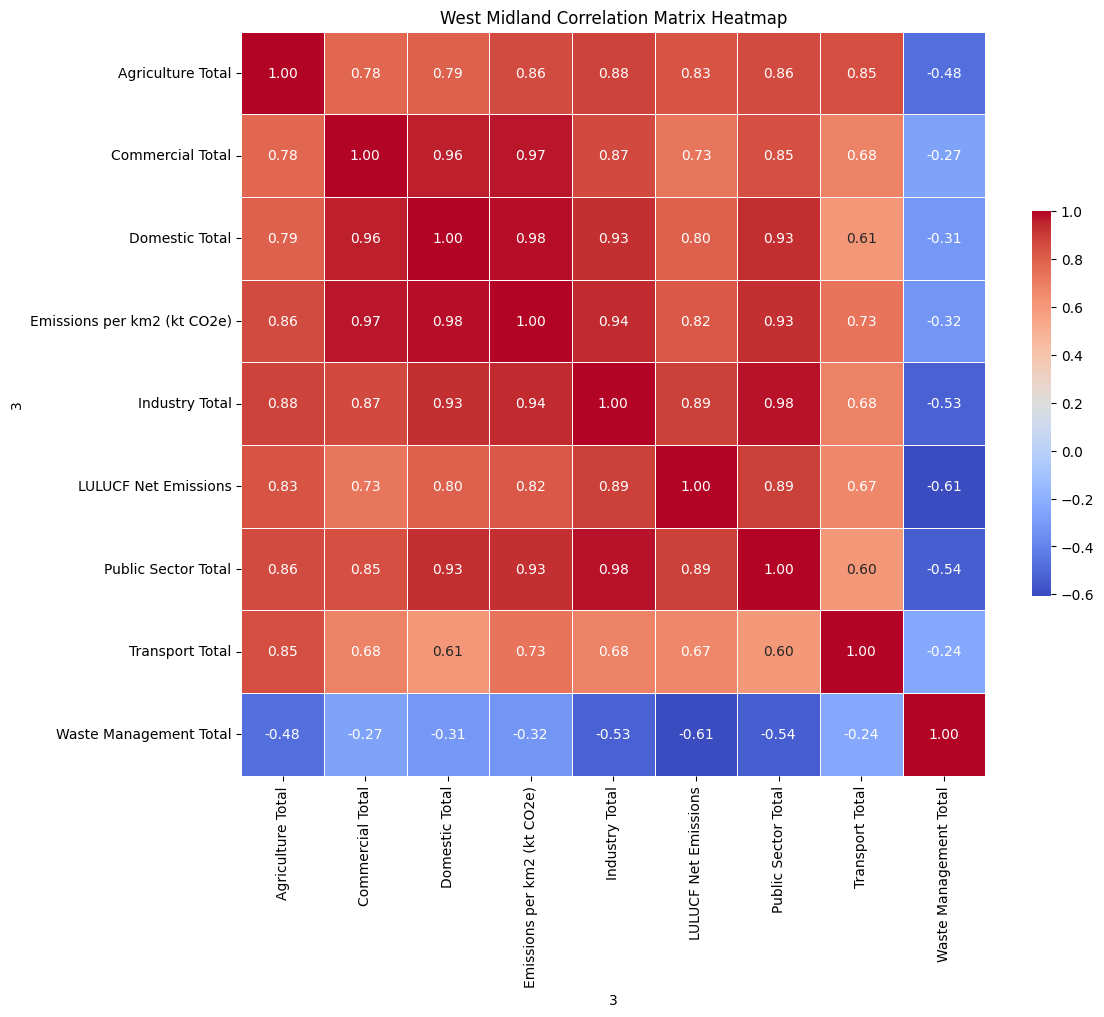

In [57]:
# Generate the correlation matrix
corr = pivot_table.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('West Midland Correlation Matrix Heatmap')

# Show the plot
plt.show()

Values close to 1 indicate a strong positive correlation, meaning that as one feature increases, the other tends to increase as well.

Values close to -1 indicate a strong negative correlation, meaning that as one feature increases, the other tends to decrease.

Values close to 0 indicate little to no linear relationship between the features.

In [58]:
# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']
# Add columns that end with "Total"
columns_to_keep.extend([col for col in west_midlands_data_filtered.columns if col.endswith("Total")])



In [59]:
west_midlands_filtered_columns = west_midlands_data_filtered[columns_to_keep]

west_midlands_filtered_columns.to_csv('west_midlands_filtered_columns.csv')
west_midlands_filtered_columns

3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LULUCF Net Emissions,Industry Total,Commercial Total,Public Sector Total,Domestic Total,Transport Total,Agriculture Total,Waste Management Total,Grand Total
2040,West Midlands,Birmingham,Birmingham,E08000025,2005,13.873543,1216.162658,1170.441473,558.70517,2359.376951,1670.971299,15.128539,54.674741,7059.334372
2041,West Midlands,Birmingham,Birmingham,E08000025,2006,13.855886,1199.131422,1168.499559,519.502282,2365.574895,1610.744841,15.762343,59.040806,6952.112034
2042,West Midlands,Birmingham,Birmingham,E08000025,2007,13.477209,1176.697923,1111.410745,492.80575,2283.42429,1621.32779,15.055982,86.322633,6800.522322
2043,West Midlands,Birmingham,Birmingham,E08000025,2008,12.998567,1175.523168,1143.259246,489.438236,2284.490311,1545.527971,14.784999,78.655141,6744.677640
2044,West Midlands,Birmingham,Birmingham,E08000025,2009,12.151837,937.944889,945.363805,423.187511,2062.886425,1497.902337,13.508004,206.792247,6099.737055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,West Midlands,Worcestershire,Wyre Forest,E07000239,2017,-22.99366,81.578795,39.204973,18.44841,154.11273,155.081565,33.125984,40.831584,499.390383
2580,West Midlands,Worcestershire,Wyre Forest,E07000239,2018,-22.677647,99.82282,23.783474,18.025695,149.76546,151.453539,32.343872,37.19314,489.710354
2581,West Midlands,Worcestershire,Wyre Forest,E07000239,2019,-22.823968,84.767255,22.492546,15.106118,144.241608,146.896973,31.772339,36.456934,458.909804
2582,West Midlands,Worcestershire,Wyre Forest,E07000239,2020,-23.150931,75.302885,16.067331,14.061786,141.095909,118.871468,30.189129,36.122034,408.559610


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [60]:
# Create the pivot table of west_midlands local authorities emission
west_midlands_local_authority_emissions = pd.pivot_table(west_midlands_filtered_columns, values='Grand Total', index=['Local Authority'], columns=['Calendar Year'])

west_midlands_local_authority_emissions

Calendar Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Local Authority,,,,,,,,,,,,,,,,,
Birmingham,7059.334372,6952.112034,6800.522322,6744.677640,6099.737055,6412.804284,5805.907414,6094.847957,5928.649539,5283.528982,5187.812112,5018.990855,4952.980766,4694.297182,4500.378294,4177.186378,4480.654084
Bromsgrove,956.642291,966.027098,1014.325992,966.508457,915.239428,943.043254,865.875640,885.439318,875.957613,847.917226,839.358149,828.019311,799.333806,765.570975,756.273104,655.139864,711.760256
Cannock Chase,588.979929,597.874966,584.212829,554.965633,534.431424,565.871617,516.643905,523.651492,521.293200,463.806795,448.224377,432.415392,438.056787,428.182712,400.378294,360.878619,364.042820
Coventry,2285.257172,2244.459643,2109.501041,2028.053404,1835.162506,1962.611578,1766.002096,1881.254900,1815.756821,1664.671871,1647.571233,1574.337656,1548.946359,1496.667926,1428.701726,1280.312165,1344.000349
Dudley,1983.590348,1972.154700,1888.505634,1818.345968,1657.763334,1778.665829,1603.028674,1645.915361,1619.695684,1452.515600,1412.477913,1356.141083,1347.120418,1295.213550,1217.885198,1079.756656,1163.033149
East Staffordshire,1287.270750,1298.775799,1260.546128,1245.328814,1170.588639,1228.732489,1160.773439,1165.877455,1143.246946,1050.973296,1014.291935,988.598271,981.240089,966.664142,903.141998,810.544121,853.521292
"Herefordshire, County of",2091.684474,2090.207781,2038.853224,1975.986634,1872.500149,1994.484316,1849.438619,1892.331768,1847.560317,1777.587181,1696.464807,1660.690961,1618.084774,1598.639996,1527.132610,1364.626064,1472.865799
Lichfield,1004.513597,1022.789515,1013.242837,993.374843,955.231477,981.016859,931.692962,938.137617,935.001562,875.810423,863.532062,850.456232,851.408592,837.842706,813.911260,691.404937,754.890754
Malvern Hills,772.773159,799.621230,848.442583,797.397569,757.938462,782.645008,723.285139,726.094378,717.922272,695.654404,688.580938,676.822279,655.588099,642.098370,619.590085,538.434311,601.444378


In [61]:
import pandas as pd

# Calculate the yearly total emissions for each year
yearly_totals = west_midlands_local_authority_emissions.sum()

# Append the totals as a new row to the DataFrame
west_midlands_local_authority_emissions.loc['Total'] = yearly_totals

west_midlands_local_authority_emissions

Calendar Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Local Authority,,,,,,,,,,,,,,,,,
Birmingham,7059.334372,6952.112034,6800.522322,6744.677640,6099.737055,6412.804284,5805.907414,6094.847957,5928.649539,5283.528982,5187.812112,5018.990855,4952.980766,4694.297182,4500.378294,4177.186378,4480.654084
Bromsgrove,956.642291,966.027098,1014.325992,966.508457,915.239428,943.043254,865.875640,885.439318,875.957613,847.917226,839.358149,828.019311,799.333806,765.570975,756.273104,655.139864,711.760256
Cannock Chase,588.979929,597.874966,584.212829,554.965633,534.431424,565.871617,516.643905,523.651492,521.293200,463.806795,448.224377,432.415392,438.056787,428.182712,400.378294,360.878619,364.042820
Coventry,2285.257172,2244.459643,2109.501041,2028.053404,1835.162506,1962.611578,1766.002096,1881.254900,1815.756821,1664.671871,1647.571233,1574.337656,1548.946359,1496.667926,1428.701726,1280.312165,1344.000349
Dudley,1983.590348,1972.154700,1888.505634,1818.345968,1657.763334,1778.665829,1603.028674,1645.915361,1619.695684,1452.515600,1412.477913,1356.141083,1347.120418,1295.213550,1217.885198,1079.756656,1163.033149
East Staffordshire,1287.270750,1298.775799,1260.546128,1245.328814,1170.588639,1228.732489,1160.773439,1165.877455,1143.246946,1050.973296,1014.291935,988.598271,981.240089,966.664142,903.141998,810.544121,853.521292
"Herefordshire, County of",2091.684474,2090.207781,2038.853224,1975.986634,1872.500149,1994.484316,1849.438619,1892.331768,1847.560317,1777.587181,1696.464807,1660.690961,1618.084774,1598.639996,1527.132610,1364.626064,1472.865799
Lichfield,1004.513597,1022.789515,1013.242837,993.374843,955.231477,981.016859,931.692962,938.137617,935.001562,875.810423,863.532062,850.456232,851.408592,837.842706,813.911260,691.404937,754.890754
Malvern Hills,772.773159,799.621230,848.442583,797.397569,757.938462,782.645008,723.285139,726.094378,717.922272,695.654404,688.580938,676.822279,655.588099,642.098370,619.590085,538.434311,601.444378


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
data_transposed = west_midlands_local_authority_emissions

data_transposed

Calendar Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Local Authority,,,,,,,,,,,,,,,,,
Birmingham,7059.334372,6952.112034,6800.522322,6744.677640,6099.737055,6412.804284,5805.907414,6094.847957,5928.649539,5283.528982,5187.812112,5018.990855,4952.980766,4694.297182,4500.378294,4177.186378,4480.654084
Bromsgrove,956.642291,966.027098,1014.325992,966.508457,915.239428,943.043254,865.875640,885.439318,875.957613,847.917226,839.358149,828.019311,799.333806,765.570975,756.273104,655.139864,711.760256
Cannock Chase,588.979929,597.874966,584.212829,554.965633,534.431424,565.871617,516.643905,523.651492,521.293200,463.806795,448.224377,432.415392,438.056787,428.182712,400.378294,360.878619,364.042820
Coventry,2285.257172,2244.459643,2109.501041,2028.053404,1835.162506,1962.611578,1766.002096,1881.254900,1815.756821,1664.671871,1647.571233,1574.337656,1548.946359,1496.667926,1428.701726,1280.312165,1344.000349
Dudley,1983.590348,1972.154700,1888.505634,1818.345968,1657.763334,1778.665829,1603.028674,1645.915361,1619.695684,1452.515600,1412.477913,1356.141083,1347.120418,1295.213550,1217.885198,1079.756656,1163.033149
East Staffordshire,1287.270750,1298.775799,1260.546128,1245.328814,1170.588639,1228.732489,1160.773439,1165.877455,1143.246946,1050.973296,1014.291935,988.598271,981.240089,966.664142,903.141998,810.544121,853.521292
"Herefordshire, County of",2091.684474,2090.207781,2038.853224,1975.986634,1872.500149,1994.484316,1849.438619,1892.331768,1847.560317,1777.587181,1696.464807,1660.690961,1618.084774,1598.639996,1527.132610,1364.626064,1472.865799
Lichfield,1004.513597,1022.789515,1013.242837,993.374843,955.231477,981.016859,931.692962,938.137617,935.001562,875.810423,863.532062,850.456232,851.408592,837.842706,813.911260,691.404937,754.890754
Malvern Hills,772.773159,799.621230,848.442583,797.397569,757.938462,782.645008,723.285139,726.094378,717.922272,695.654404,688.580938,676.822279,655.588099,642.098370,619.590085,538.434311,601.444378


In [63]:
X = data_transposed.loc[:, 2005:2020]
y = data_transposed[2021]

In [64]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)


In [65]:
# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluate the model
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

# Predicting
y_pred = regressor.predict(X_test)

# Printing shapes of predictions and test labels
print(y_pred.shape, y_test.shape)

Intercept: 6.358880146775391
Coefficients: [-0.46276701  0.67328558  0.02979568 -0.1036658   0.22833449 -0.08693259
  0.27250066 -0.04820699 -0.75399125  0.09281595 -0.12834322  0.4178228
  0.71459305 -0.42653192 -0.53009634  1.15639934]
(7,) (7,)


In [66]:
X

Calendar Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Local Authority,,,,,,,,,,,,,,,,
Birmingham,7059.334372,6952.112034,6800.522322,6744.677640,6099.737055,6412.804284,5805.907414,6094.847957,5928.649539,5283.528982,5187.812112,5018.990855,4952.980766,4694.297182,4500.378294,4177.186378
Bromsgrove,956.642291,966.027098,1014.325992,966.508457,915.239428,943.043254,865.875640,885.439318,875.957613,847.917226,839.358149,828.019311,799.333806,765.570975,756.273104,655.139864
Cannock Chase,588.979929,597.874966,584.212829,554.965633,534.431424,565.871617,516.643905,523.651492,521.293200,463.806795,448.224377,432.415392,438.056787,428.182712,400.378294,360.878619
Coventry,2285.257172,2244.459643,2109.501041,2028.053404,1835.162506,1962.611578,1766.002096,1881.254900,1815.756821,1664.671871,1647.571233,1574.337656,1548.946359,1496.667926,1428.701726,1280.312165
Dudley,1983.590348,1972.154700,1888.505634,1818.345968,1657.763334,1778.665829,1603.028674,1645.915361,1619.695684,1452.515600,1412.477913,1356.141083,1347.120418,1295.213550,1217.885198,1079.756656
East Staffordshire,1287.270750,1298.775799,1260.546128,1245.328814,1170.588639,1228.732489,1160.773439,1165.877455,1143.246946,1050.973296,1014.291935,988.598271,981.240089,966.664142,903.141998,810.544121
"Herefordshire, County of",2091.684474,2090.207781,2038.853224,1975.986634,1872.500149,1994.484316,1849.438619,1892.331768,1847.560317,1777.587181,1696.464807,1660.690961,1618.084774,1598.639996,1527.132610,1364.626064
Lichfield,1004.513597,1022.789515,1013.242837,993.374843,955.231477,981.016859,931.692962,938.137617,935.001562,875.810423,863.532062,850.456232,851.408592,837.842706,813.911260,691.404937
Malvern Hills,772.773159,799.621230,848.442583,797.397569,757.938462,782.645008,723.285139,726.094378,717.922272,695.654404,688.580938,676.822279,655.588099,642.098370,619.590085,538.434311


In [67]:
y

Local Authority
Birmingham                   4480.654084
Bromsgrove                    711.760256
Cannock Chase                 364.042820
Coventry                     1344.000349
Dudley                       1163.033149
East Staffordshire            853.521292
Herefordshire, County of     1472.865799
Lichfield                     754.890754
Malvern Hills                 601.444378
Newcastle-under-Lyme          844.190037
North Warwickshire            919.630410
Nuneaton and Bedworth         540.854821
Redditch                      357.787785
Rugby                        2026.454350
Sandwell                     1401.088684
Shropshire                   2773.370585
Solihull                     1226.181599
South Staffordshire           954.939263
Stafford                     1166.734395
Staffordshire Moorlands      1332.991944
Stoke-on-Trent               1127.356084
Stratford-on-Avon            1120.139928
Tamworth                      268.838288
Telford and Wrekin           1002.876199


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

west_midlands_local_authority_emissions

X = west_midlands_local_authority_emissions.loc[:, 2005:2020]
y = west_midlands_local_authority_emissions[2021]

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluate the model
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

#predicting the test set result
y_pred = regressor.predict(X_test)
print(y_pred.shape,y_test.shape)
y_pred,y_test

Intercept: 6.358880146775391
Coefficients: [-0.46276701  0.67328558  0.02979568 -0.1036658   0.22833449 -0.08693259
  0.27250066 -0.04820699 -0.75399125  0.09281595 -0.12834322  0.4178228
  0.71459305 -0.42653192 -0.53009634  1.15639934]
(7,) (7,)


(array([1232.85624046,  738.78645797,  880.00216811,  393.21771001,
        1375.03203259, 1101.11372555, 2054.79029596]),
 Local Authority
 Stoke-on-Trent        1127.356084
 Lichfield              754.890754
 East Staffordshire     853.521292
 Cannock Chase          364.042820
 Coventry              1344.000349
 Stratford-on-Avon     1120.139928
 Rugby                 2026.454350
 Name: 2021, dtype: float64)

Based on the output from the linear regression model, an approximate prediction equation for the emissions in 2021 is formed. The equation is structured as follows, where  Xi
  represents the emissions in year  2005+i
  (for  i=0,1,2,…,15
 ):

Emissions2021=Intercept+c1⋅X0+c2⋅X1+⋯+c16⋅X15

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)

# Calculating the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 36.52200721575982
Mean Squared Error: 2152.847138464159
R-squared Score: 0.9908041610887399
Root Mean Squared Error: 46.39878380371795


In [70]:
import numpy as np
from sklearn.metrics import mean_squared_error

n = len(y_train)  # number of observations
k = regressor.coef_.shape[0] + 1  # number of parameters (including the intercept)
mse = mean_squared_error(y_test, y_pred)
residuals = y_test - y_pred
sse = np.sum(residuals**2)

# Log-likelihood
sigma_squared = mse
log_likelihood = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(sigma_squared) - (1 / (2 * sigma_squared)) * sse

# AIC and BIC
aic = 2 * k - 2 * log_likelihood
bic = np.log(n) * k - 2 * log_likelihood

print(f"Log-likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

Log-likelihood: -117.6490827431983
AIC: 269.2981654863966
BIC: 289.3250806023117


In [72]:
from joblib import dump, load

# Save the model to a file
dump(regressor, 'regression_model.joblib')

['regression_model.joblib']

In [73]:
# Load the model from the file
model = load('regression_model.joblib')

#using model to make predictions
predictions = model.predict(X_test)
predictions

array([1232.85624046,  738.78645797,  880.00216811,  393.21771001,
       1375.03203259, 1101.11372555, 2054.79029596])

<h1>Regularization</h1>

In [74]:
from sklearn.linear_model import Ridge

# alpha is the regularization strength
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

# Evaluate the model
print("Ridge Intercept:", ridge_regressor.intercept_)
print("Ridge Coefficients:", ridge_regressor.coef_)

Ridge Intercept: 6.3307664699927955
Ridge Coefficients: [-0.46163039  0.67037142  0.03020056 -0.1029915   0.227319   -0.08501577
  0.27113205 -0.04987767 -0.7495865   0.0921018  -0.12857463  0.41587872
  0.71317622 -0.42469931 -0.52754111  1.1546043 ]


In [75]:
from sklearn.linear_model import Ridge

# alpha is the regularization strength
ridge_regressor = Ridge(alpha=100.0)
ridge_regressor.fit(X_train, y_train)

# Evaluate the model
print("Ridge Intercept:", ridge_regressor.intercept_)
print("Ridge Coefficients:", ridge_regressor.coef_)

Ridge Intercept: 4.481125697583138
Ridge Coefficients: [-0.38037044  0.47012366  0.05645802 -0.05364498  0.15741921  0.03862311
  0.17829713 -0.15852069 -0.45722296  0.04778057 -0.14460857  0.28552221
  0.62054214 -0.29976001 -0.35579393  1.03004119]


In [76]:
from sklearn.linear_model import Lasso

# alpha is the regularization strength
# LASSO - least Absolute shrinkage and selection operator
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train, y_train)

# Evaluate the model
print("Lasso Intercept:", lasso_regressor.intercept_)
print("Lasso Coefficients:", lasso_regressor.coef_)

Lasso Intercept: -1.4061609092946128
Lasso Coefficients: [ 0.45178845  0.02498617  0.02119755 -0.01147759  0.05330843 -0.01046445
  0.03259591 -0.03411763  0.01705936  0.09285746  0.00864468  0.04476419
 -0.01143675  0.05593699  0.01605408 -0.03222047]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+05, tolerance: 1.036e+05
  model = cd_fast.enet_coordinate_descent(


In [77]:
from sklearn.linear_model import ElasticNet

# alpha is the regularization strength and l1_ratio controls the ratio of L1 to L2 penalty
elasticnet_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_regressor.fit(X_train, y_train)

# Evaluate the model
print("ElasticNet Intercept:", elasticnet_regressor.intercept_)
print("ElasticNet Coefficients:", elasticnet_regressor.coef_)

ElasticNet Intercept: -1.4061474442137296
ElasticNet Coefficients: [ 0.45178939  0.02498646  0.02119755 -0.01147869  0.0533097  -0.01046568
  0.03259726 -0.03411897  0.01706075  0.0928575   0.00864475  0.04476423
 -0.01143857  0.05593888  0.01605418 -0.03222293]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+05, tolerance: 1.036e+05
  model = cd_fast.enet_coordinate_descent(


In [78]:
from sklearn.linear_model import RidgeCV

# Define a set of alpha values to test
alphas = [0.1, 1.0, 10.0, 100.0]

# Create the RidgeCV regressor
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Retrieve the best alpha and coefficients
best_alpha = ridge_cv.alpha_
print("Best Alpha:", best_alpha)
print("RidgeCV Intercept:", ridge_cv.intercept_)
print("RidgeCV Coefficients:", ridge_cv.coef_)

#Inspecting the mean squared errors for each alpha
cv_mse = np.mean(ridge_cv.cv_values_, axis=0)
print("Mean Squared Errors for each alpha:", cv_mse)

Best Alpha: 0.1
RidgeCV Intercept: 6.485720935332665
RidgeCV Coefficients: [-0.46265593  0.67299     0.02983337 -0.10360101  0.22822987 -0.0867428
  0.27236064 -0.04837748 -0.75355143  0.09274174 -0.12836883  0.41762525
  0.71444846 -0.42635013 -0.52984182  1.15621724]
Mean Squared Errors for each alpha: [23895.77934164 23904.96437214 23987.0162261  24016.52621662]


In [79]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_test_pred = ridge_cv.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R-squared Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared Score: 0.9907998002711973
Mean Squared Error: 2153.8680538649833
Root Mean Squared Error: 46.409784031656336


In [80]:
# Define a set of alpha values to test
alphas = [0.1, 1.0, 10.0, 100.0]

# Create the RidgeCV regressor
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_absolute_error', store_cv_values=True)

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Retrieve the best alpha and coefficients
best_alpha = ridge_cv.alpha_
print("Best Alpha:", best_alpha)

Best Alpha: 100.0
